In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [4]:
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [5]:
#read in data
df = pd.read_csv(r'C:\Users\chris\Documents\sql portfolio projects\4-movies\movies.csv')

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#fill in null values and change data types
df = df.fillna(0)
df['budget'].astype('int64')
df['gross'].astype('int64')
df['released'].astype(str)


0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [9]:
# create a column for release country and corrected year
df['country'] = ""
df['correctedYear'] = ""

In [10]:
try:
    for item in df.index:       
        countryWordIndex = df['released'][item].index('(') + 1
        df['country'][item]= df['released'][item][countryWordIndex:df['released'][item].index(')')]
        yearIndex = df['released'][item].index('(') - 5  
        df['correctedYear'][item] = df['released'][item][yearIndex:(yearIndex+4)]   
except AttributeError:
    pass

In [11]:
#drop old year released column
df.drop('year', axis=1, inplace=True)

In [12]:
df.sort_values(by=['gross'], inplace = False,ascending = False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedYear
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,,356000000.0,2.797501e+09,Marvel Studios,181.0,
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,,245000000.0,2.069522e+09,Lucasfilm,138.0,
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,,321000000.0,2.048360e+09,Marvel Studios,149.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0.0,0.000000e+00,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United States,0.0,0.000000e+00,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,United States,0.0,0.000000e+00,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,0,Comedy,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Japan,0.0,0.000000e+00,Budapest Stúdió Vállalat,104.0,1990


In [13]:
#drop duplicates
df.drop_duplicates()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedYear
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,,7000.0,0.0,0,90.0,
7664,Dream Round,0,Comedy,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,,0.0,0.0,Cactus Blue Entertainment,90.0,
7665,Saving Mbango,0,Drama,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,,58750.0,0.0,Embi Productions,0.0,
7666,It's Just Us,0,Drama,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,,15000.0,0.0,0,120.0,


<AxesSubplot:>

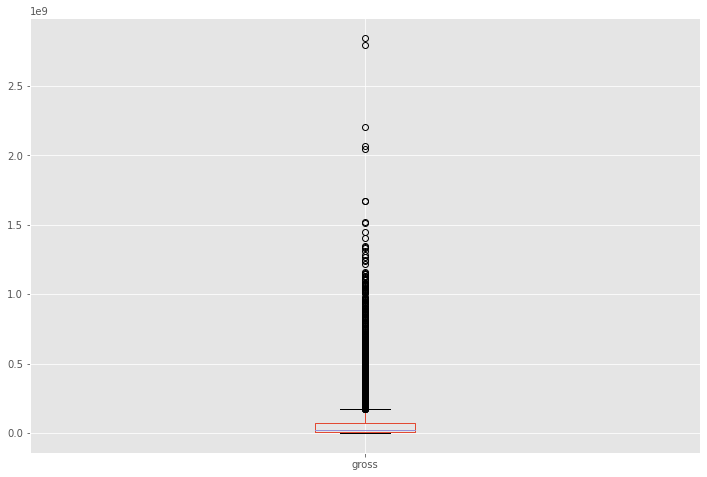

In [14]:
#check for outliers
df.boxplot(column = ['gross'])

<function matplotlib.pyplot.show(close=None, block=None)>

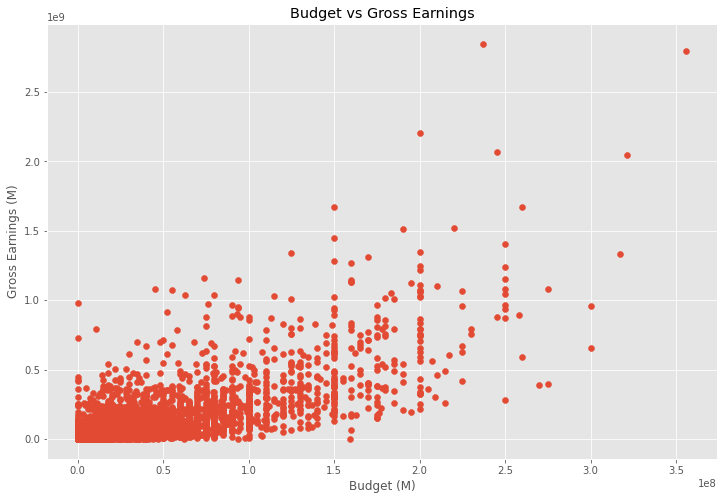

In [15]:
#scatter plot with budget vs gross revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget (M)')
plt.ylabel('Gross Earnings (M)')
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

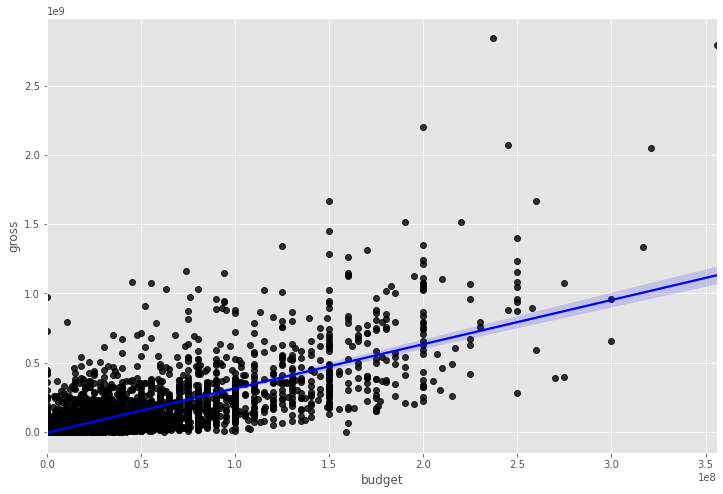

In [16]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws = {"color": "black"}, line_kws = {"color": "blue"})

In [17]:
df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.394564,0.306984,0.268372,0.244339,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

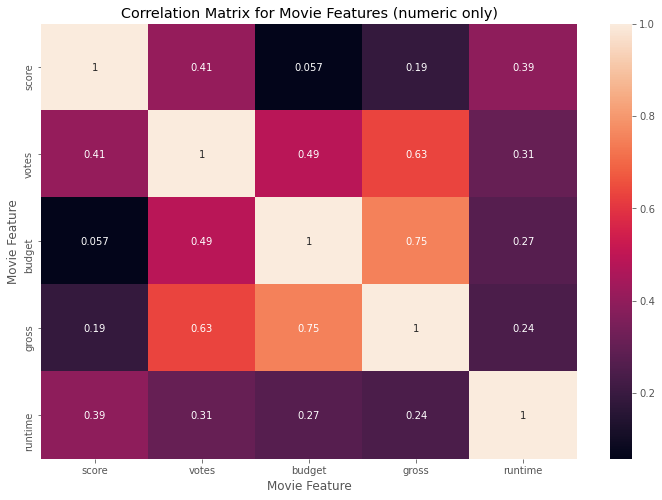

In [18]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Movie Features (numeric only)')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show

In [19]:
#create a new frame with numerical values assigned to column values
df_numeric = df
for col_name in df_numeric:
    if(df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes



In [20]:
df_numeric.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedYear
0,6587,7,6,1706,8.4,927000.0,2589,4015,1048,48,19000000.0,46998772.0,2320,146.0,1
1,5573,7,1,1493,5.8,65000.0,2269,1633,328,48,4500000.0,58853106.0,732,104.0,1
2,5142,5,0,1772,8.7,1200000.0,1111,2568,1746,48,18000000.0,538375067.0,1541,124.0,1
3,286,5,4,1493,7.7,221000.0,1301,2001,2247,48,3500000.0,83453539.0,1813,88.0,1
4,1027,7,4,1544,7.3,108000.0,1054,522,411,48,6000000.0,39846344.0,1778,98.0,1


<function matplotlib.pyplot.show(close=None, block=None)>

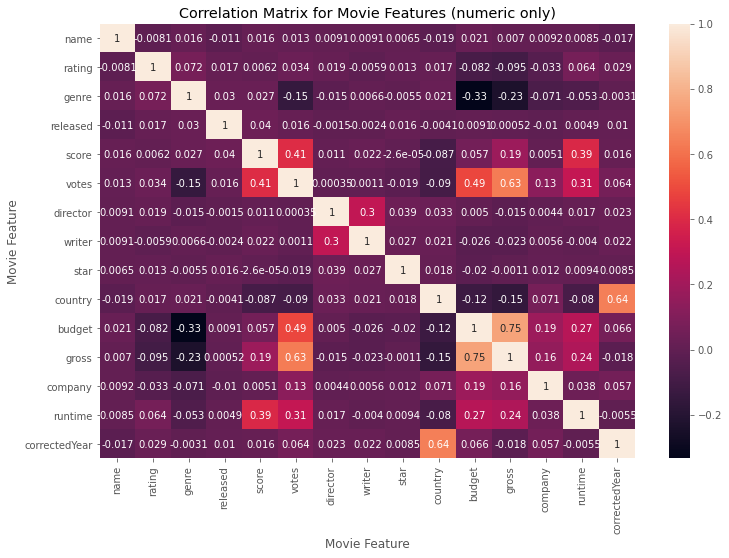

In [21]:
correlation_matrix = df_numeric.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Movie Features (numeric only)')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show

In [22]:
df_numeric.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctedYear
name,1.000000,-0.008069,0.016355,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.018807,0.020548,0.006989,0.009211,0.008483,-0.016646
rating,-0.008069,1.000000,0.072423,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.016516,-0.081939,-0.095450,-0.032943,0.064133,0.029169
genre,0.016355,0.072423,1.000000,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,0.020966,-0.334021,-0.234297,-0.071067,-0.052914,-0.003147
released,-0.011311,0.016613,0.029822,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.004102,0.009145,0.000519,-0.010474,0.004852,0.010449
score,0.016377,0.006192,0.027384,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.087272,0.056863,0.186012,0.005081,0.394564,0.015887
votes,0.013038,0.033743,-0.145296,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,-0.090090,0.486931,0.632870,0.133457,0.306984,0.063946
director,0.009079,0.019483,-0.015258,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.032581,0.004976,-0.014916,0.004404,0.017062,0.023488
writer,0.009081,-0.005921,0.006567,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.020954,-0.025911,-0.022997,0.005646,-0.004036,0.021601
star,0.006472,0.013405,-0.005477,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,0.018495,-0.019952,-0.001129,0.012442,0.009418,0.008464
country,-0.018807,0.016516,0.020966,-0.004102,-0.087272,-0.090090,0.032581,0.020954,0.018495,1.000000,-0.122992,-0.152876,0.071115,-0.079746,0.644604


In [26]:
#list all the features and there corresponding correlations
correlation_matrix = df_numeric.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs


name           name             1.000000
               rating          -0.008069
               genre            0.016355
               released        -0.011311
               score            0.016377
                                  ...   
correctedYear  budget           0.065639
               gross           -0.017781
               company          0.057181
               runtime         -0.005502
               correctedYear    1.000000
Length: 225, dtype: float64

In [28]:
#sort the correlation pairs in order of correlation value
pd.set_option('display.max_rows', None)
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre          budget          -0.334021
budget         genre           -0.334021
gross          genre           -0.234297
genre          gross           -0.234297
country        gross           -0.152876
gross          country         -0.152876
genre          votes           -0.145296
votes          genre           -0.145296
country        budget          -0.122992
budget         country         -0.122992
gross          rating          -0.095450
rating         gross           -0.095450
votes          country         -0.090090
country        votes           -0.090090
score          country         -0.087272
country        score           -0.087272
rating         budget          -0.081939
budget         rating          -0.081939
runtime        country         -0.079746
country        runtime         -0.079746
company        genre           -0.071067
genre          company         -0.071067
               runtime         -0.052914
runtime        genre           -0.052914
rating         c

In [ ]:
#budget and user votes had the highest correlation to gross revenue